## Домашнее задание 3.2

### Импорт библиотек

In [495]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.errors import SettingWithCopyWarning

import warnings

### Глобальные настройки

In [496]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

### Изучаем данные

*Подключаемся к базе*

In [497]:
cnx = sqlite3.connect('../datasets/database.sqlite')

*Таблицы в базе*

In [498]:
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", cnx)

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


*Знакомство с таблицами*

In [499]:
df_Player_Attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df_Player = pd.read_sql_query("SELECT * FROM Player", cnx)
df_Match = pd.read_sql_query("SELECT * FROM Match", cnx)
df_League = pd.read_sql_query("SELECT * FROM League", cnx)
df_Country = pd.read_sql_query("SELECT * FROM Country", cnx)
df_Team = pd.read_sql_query("SELECT * FROM Team", cnx)
df_Team_Attributes = pd.read_sql_query("SELECT * FROM Team_Attributes", cnx)

COUNT_LINE = 0

print(f"{'-'*20}df_Player_Attributes{'-'*130}")
display(df_Player_Attributes.head(COUNT_LINE))
print(f"{'-'*20}df_Player{'-'*130}")
display(df_Player.head(COUNT_LINE))
print(f"{'-'*20}df_Match{'-'*130}")
display(df_Match.head(COUNT_LINE))
print(f"{'-'*20}df_League{'-'*130}")
display(df_League.head(COUNT_LINE))
print(f"{'-'*20}df_Country{'-'*130}")
display(df_Country.head(COUNT_LINE))
print(f"{'-'*20}df_Team{'-'*130}")
display(df_Team.head(COUNT_LINE))
print(f"{'-'*20}df_Team_Attributes{'-'*130}")
display(df_Team_Attributes.head(0))


--------------------df_Player_Attributes----------------------------------------------------------------------------------------------------------------------------------


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes


--------------------df_Player----------------------------------------------------------------------------------------------------------------------------------


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight


--------------------df_Match----------------------------------------------------------------------------------------------------------------------------------


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA


--------------------df_League----------------------------------------------------------------------------------------------------------------------------------


,id,country_id,name


--------------------df_Country----------------------------------------------------------------------------------------------------------------------------------


,id,name


--------------------df_Team----------------------------------------------------------------------------------------------------------------------------------


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name


--------------------df_Team_Attributes----------------------------------------------------------------------------------------------------------------------------------


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass


### Иследования

**1.**<br>
*Очень часто коллеги упоминают Серию А. Может, она действительно интересная? Посмотрите, сколько там забивают суммарно голов за матч. Постройте гистограмму соответствующего данным типа. Оцените скошенность распределения визуально и подтвердите или опровергните свою гипотезу о скошенности, вычислив среднее, медиану и моду для проверки правила об их соотношении.*

Среднее 2.6168379184620485
Медиана 2.0
Мода [2]


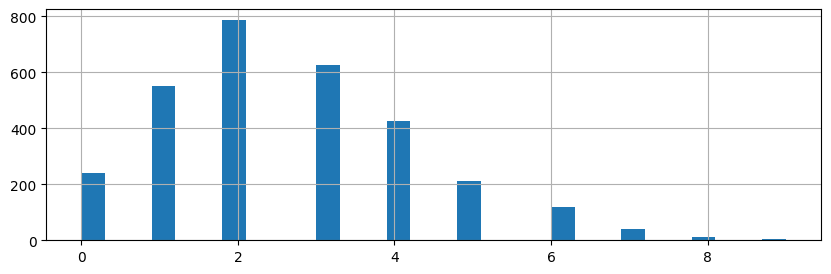

In [500]:
id_seria_A = df_League[df_League['name'] == 'Italy Serie A']['id'].values[0]

gools_in_seria_A = pd.read_sql_query(
    f'''
    SELECT id AS match_id,
           home_team_goal + away_team_goal AS goals
      FROM Match
     WHERE league_id = {id_seria_A};
    '''
    , cnx)

plt.figure(figsize=(10, 3))
gools_in_seria_A['goals'].hist(bins=30)

print(f"Среднее {gools_in_seria_A['goals'].mean()}")
print(f"Медиана {gools_in_seria_A['goals'].median()}")
print(f"Мода {list(gools_in_seria_A['goals'].mode())}")

**2.**<br> 
*Не так уж много голов забивается в Серии А, а в каких лигах забивается в среднем голов за матч больше? Выведите их названия.*

In [501]:
liga_in_goals = pd.read_sql_query(
    f'''
    SELECT Match.league_id,
           League.name AS league_name,
           AVG(Match.home_team_goal + Match. away_team_goal) AS mean_goals
      FROM Match
           JOIN League ON League.id = Match.league_id
     GROUP BY league_id, League.name;
    '''
    , cnx)

mean_seria_A = liga_in_goals[liga_in_goals['league_name'] == 'Italy Serie A']['mean_goals'].values[0]
list_league_big_seria_A = liga_in_goals[liga_in_goals['mean_goals'] > mean_seria_A]['league_name']

print(*list_league_big_seria_A.values, sep='\n')

Belgium Jupiler League
England Premier League
Germany 1. Bundesliga
Netherlands Eredivisie
Scotland Premier League
Spain LIGA BBVA
Switzerland Super League


**3.**<br>
*Таких лиг довольно много. Выберем самую интересную лигу и самый интересный сезон в ней. Для этого посчитаем следующие показатели:*
- *сколько в среднем в каждом сезоне каждой лиги забивалось суммарно голов командами за матч*
- *сколько в среднем матчей за сезон заканчивались победой, а не ничьей.*

In [502]:
leagues_sesons = pd.read_sql_query(
    f'''
    WITH table_1 AS (
          SELECT Match.league_id,
                 Match.season,
                 League.name AS league_name,
                 Match.home_team_goal + Match. away_team_goal AS mean_goals,
                 Match.home_team_goal AS home_goals,
                 Match.away_team_goal AS away_goals,
                 CASE
                 WHEN Match.home_team_goal - Match.away_team_goal <> 0 THEN 1
                 ELSE 0
                 END AS victory
            FROM Match
                 JOIN League ON League.id = Match.league_id)

    SELECT table_1.league_name AS league_name,
           table_1.season AS season,
           SUM(mean_goals) AS mean_goals,
           SUM(victory) AS victory
      FROM table_1
     GROUP BY league_name, season

    '''
    , cnx)

# Лига в которой больше всего в среднем голов за сезон
best_league_goals = leagues_sesons.groupby(by='league_name').agg(mean_gols_seson = ('mean_goals', 'mean'))
best_league_goals = best_league_goals['mean_gols_seson'].idxmax()

# Лига в которой больше всего в среднем результативных матчей за сезон
best_league_victory = leagues_sesons.groupby(by='league_name').agg(count_victory_match = ('victory', 'mean'))
best_league_victory = best_league_victory['count_victory_match'].idxmax()

# Самый интересный сезон в самой интересной лиги
best_seson = leagues_sesons.loc[leagues_sesons[leagues_sesons['league_name'] == best_league_goals]['victory'].idxmax(), 'season']

print(
    f'''
     Лига в которой больше всего в среднем голов за сезон: `{best_league_goals}`
     Лига в которой больше всего в среднем результативных матчей за сезон: `{best_league_victory}`
     Самый интересный сезон в самой интересной лиги: `{best_seson}`
     '''
     )


     Лига в которой больше всего в среднем голов за сезон: `Spain LIGA BBVA`
     Лига в которой больше всего в среднем результативных матчей за сезон: `Spain LIGA BBVA`
     Самый интересный сезон в самой интересной лиги: `2010/2011`
     


**4.**<br>
*Для каждого из двух показателей, рассчитанных в предыдущем шаге, выведите самый зрелищный сезон среди всех сезонов всех лиг.*

In [503]:
# Самый зрелещный сезон за все время , метрика - количество голов
best_season_goals = leagues_sesons.loc[leagues_sesons['mean_goals'].idxmax(), 'season']

# Самый зрелещный сезон за все время , метрика - количество победных матчей
best_season_victory = leagues_sesons.loc[leagues_sesons['victory'].idxmax(), 'season']

print(
    f'''
     Самый зрелещный сезон за все время (метрика - количество голов): {best_season_goals}
     Самый зрелещный сезон за все время (метрика - количество победных матчей): {best_season_victory}
     '''
     )


     Самый зрелещный сезон за все время (метрика - количество голов): 2008/2009
     Самый зрелещный сезон за все время (метрика - количество победных матчей): 2013/2014
     


**5.**<br>
*Насколько показатели, рассчитанные в шаге 3, взаимосвязаны?*<br>
*Оцените их корреляцию и постройте для них диаграмму рассеивания, чтобы ответить на этот вопрос.*

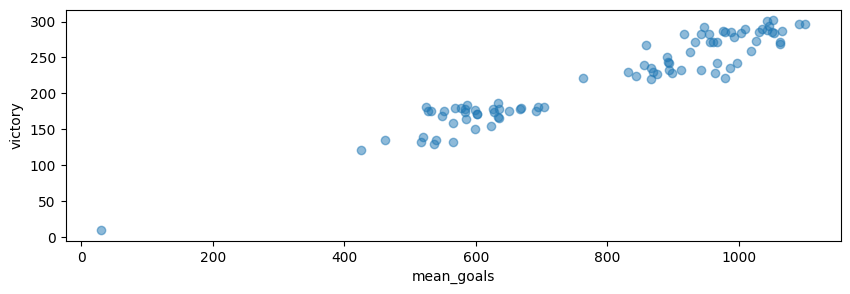

In [504]:
data = leagues_sesons.loc[:, ['mean_goals', 'victory']]

plt.figure(figsize=(10, 3))

plt.scatter(data['mean_goals'], data['victory'], alpha=0.5)
plt.xlabel('mean_goals')
plt.ylabel('victory')

plt.show()

**6.**<br>
*Выберите лигу с самым интересным сезоном. Чтобы разобраться в правилах футбола и не заскучать, посмотрим именно этот сезон!*

In [505]:
# Честно я не понимаю вас , как можно так давать задания ...
# Для меня самый интересный сезон будет сезон в котором есть самый разгромный матч , что вы хотите я не знаю !!!

leagues_sesons_gap = pd.read_sql_query(
    f'''
    SELECT Match.league_id,
           League.name AS league_name,
           Match.season,
           home_team.team_long_name AS comand_home,
           away_team.team_long_name AS comand_away,
           Match.home_team_goal AS home_goals,
           Match.away_team_goal AS away_goals,
           ABS(Match.home_team_goal - Match.away_team_goal) AS gap
      FROM Match
           JOIN League ON League.id = Match.league_id
           JOIN Team AS home_team ON home_team.team_api_id = Match.home_team_api_id
           JOIN Team AS away_team ON away_team.team_api_id = Match.away_team_api_id
    '''
    , cnx)

leagues_interesting_sesons = leagues_sesons_gap.loc[leagues_sesons_gap['gap'].idxmax(), :]
league = leagues_interesting_sesons['league_name']
season = leagues_interesting_sesons['season']
gap = leagues_interesting_sesons['gap']
comand_home = leagues_interesting_sesons['comand_home']
comand_away = leagues_interesting_sesons['comand_away']
print(
    f'''
     Лига с самым интересным сезоном: `{league}`
     Самый интересный сезон по моей метрике: `{season}`
     Именно в этом сезоне прошел тот легендарный матч между `{comand_home}` и `{comand_away}`
     Разница в счете составила: {gap} голов
     '''
)


     Лига с самым интересным сезоном: `Netherlands Eredivisie`
     Самый интересный сезон по моей метрике: `2010/2011`
     Именно в этом сезоне прошел тот легендарный матч между `PSV` и `Feyenoord`
     Разница в счете составила: 10 голов
     


**7.**<br>
Интересно, а можно ли гарантировать, что в этой лиге всегда такой интересный футбол?<br>
Оцените математическое ожидание и стандартное отклонение среднего количества голов за матч с помощью имеющейся выборки.<br> 
Затем постройте ящик с усами. И сделайте вывод, можно ли быть уверенным, что матчи в этой лиге всегда результативные.

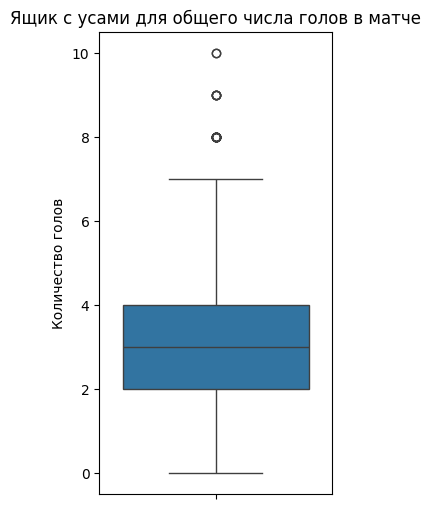


     Большенство матчей в этой лиге результативные
     Имеются выбросы , по которым можно сказать что в этой лиги были матчи с огромным счетом
     


In [506]:

df_best_league = leagues_sesons_gap.loc[leagues_sesons_gap['league_name'] == league]

df_best_league.reset_index(drop=True, inplace=True)
df_best_league['goals'] = df_best_league['home_goals'] + df_best_league['away_goals']

mean_goals = df_best_league['goals'].mean()
std_goals = df_best_league['goals'].std()

plt.figure(figsize=(3, 6))
sns.boxplot(y=df_best_league['goals'])

plt.title('Ящик с усами для общего числа голов в матче')
plt.ylabel('Количество голов')
plt.show()

print(
    f'''
     Большенство матчей в этой лиге результативные
     Имеются выбросы , по которым можно сказать что в этой лиги были матчи с огромным счетом
     '''
      )

## ПРАВКИ ПО ЗАДАНИЮ

**3.**<br>
*Таких лиг довольно много. Выберем самую интересную лигу и самый интересный сезон в ней. Для этого посчитаем следующие показатели:*
- *сколько в среднем в каждом сезоне каждой лиги забивалось суммарно голов командами за матч*
- *сколько в среднем матчей за сезон заканчивались победой, а не ничьей.*

In [507]:
best_leagues_sesons = pd.read_sql_query(
    f'''
    WITH table_1 AS (
        SELECT Match.league_id,
               League.name AS league_name,
               Match.season,
               Match.home_team_goal + Match. away_team_goal AS goals,
               Match.home_team_goal AS home_goals,
               Match.away_team_goal AS away_goals,
               CASE
               WHEN Match.home_team_goal - Match.away_team_goal <> 0 THEN 1
               ELSE 0
               END AS victory
          FROM Match
               JOIN League ON League.id = Match.league_id)

    SELECT league_name,
           season,
           round(AVG(goals), 2) AS mean_goals,
           SUM(victory) * 100 / COUNT(victory) AS percentage_result_match
      FROM table_1
     GROUP BY league_name, season
     ORDER BY mean_goals DESC, percentage_result_match DESC
    '''
    , cnx)

display(best_leagues_sesons.head(3))

print(
    f'''
     Самая интересная лига: `{best_leagues_sesons.at[0, 'league_name']}`
     Самый интересный сезон в этой лиге: `{best_leagues_sesons.at[0, 'season']}`
     Среднее количество голов за матч: `{best_leagues_sesons.at[0, 'mean_goals']}`
     Процент результативных игр составил: `{best_leagues_sesons.at[0, 'percentage_result_match']} %`
     ''')

,league_name,season,mean_goals,percentage_result_match
0,Switzerland Super League,2009/2010,3.33,83
1,Netherlands Eredivisie,2011/2012,3.26,79
2,Netherlands Eredivisie,2010/2011,3.23,76



     Самая интересная лига: `Switzerland Super League`
     Самый интересный сезон в этой лиге: `2009/2010`
     Среднее количество голов за матч: `3.33`
     Процент результативных игр составил: `83 %`
     


**4.**<br>
*Для каждого из двух показателей, рассчитанных в предыдущем шаге, выведите самый зрелищный сезон среди всех сезонов всех лиг.*

In [508]:
еntertainment_season_goals = best_leagues_sesons.at[best_leagues_sesons['mean_goals'].idxmax(), 'season']

еntertainment_season_percentage = best_leagues_sesons.at[best_leagues_sesons['percentage_result_match'].idxmax(), 'season']

print(
    f'''
     Самый зрелещный сезон , по показателю среднего кол-во голов за матч: `{еntertainment_season_goals}`
     Самый зрелещный сезон , по показателю результативности матча: `{еntertainment_season_percentage}`
     '''
     )


     Самый зрелещный сезон , по показателю среднего кол-во голов за матч: `2009/2010`
     Самый зрелещный сезон , по показателю результативности матча: `2009/2010`
     


**5.**<br>
*Насколько показатели, рассчитанные в шаге 3, взаимосвязаны?*<br>
*Оцените их корреляцию и постройте для них диаграмму рассеивания, чтобы ответить на этот вопрос.*

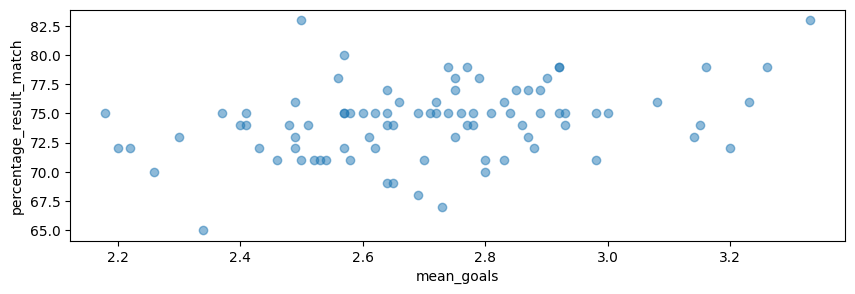

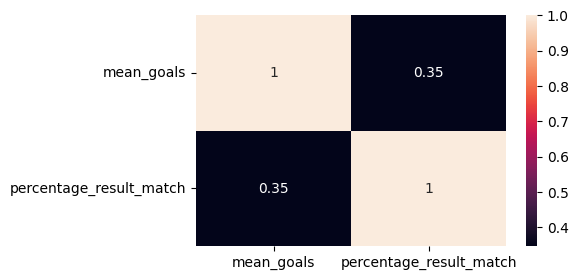

In [509]:
data = best_leagues_sesons.loc[:, ['mean_goals', 'percentage_result_match']]

plt.figure(figsize=(10, 3))

plt.scatter(data['mean_goals'], data['percentage_result_match'], alpha=0.5)
plt.xlabel('mean_goals')
plt.ylabel('percentage_result_match')

plt.show()


data = best_leagues_sesons.loc[:, ['mean_goals', 'percentage_result_match']]
plt.figure(figsize=(5, 3))
sns.heatmap(data.corr(), annot=True)

plt.show()

**6.**<br>
*Выберите лигу с самым интересным сезоном. Чтобы разобраться в правилах футбола и не заскучать, посмотрим именно этот сезон!*

In [510]:
# Я опять же не понимаю , что для Вас интересная лигааа !
# Оставляю без изменений

leagues_sesons_gap = pd.read_sql_query(
    f'''
    SELECT Match.league_id,
           League.name AS league_name,
           Match.season,
           home_team.team_long_name AS comand_home,
           away_team.team_long_name AS comand_away,
           Match.home_team_goal AS home_goals,
           Match.away_team_goal AS away_goals,
           ABS(Match.home_team_goal - Match.away_team_goal) AS gap
      FROM Match
           JOIN League ON League.id = Match.league_id
           JOIN Team AS home_team ON home_team.team_api_id = Match.home_team_api_id
           JOIN Team AS away_team ON away_team.team_api_id = Match.away_team_api_id
    '''
    , cnx)

leagues_interesting_sesons = leagues_sesons_gap.loc[leagues_sesons_gap['gap'].idxmax(), :]
league = leagues_interesting_sesons['league_name']
season = leagues_interesting_sesons['season']
gap = leagues_interesting_sesons['gap']
comand_home = leagues_interesting_sesons['comand_home']
comand_away = leagues_interesting_sesons['comand_away']
print(
    f'''
     Лига с самым интересным сезоном: `{league}`
     Самый интересный сезон по моей метрике: `{season}`
     Именно в этом сезоне прошел тот легендарный матч между `{comand_home}` и `{comand_away}`
     Разница в счете составила: {gap} голов
     '''
)


     Лига с самым интересным сезоном: `Netherlands Eredivisie`
     Самый интересный сезон по моей метрике: `2010/2011`
     Именно в этом сезоне прошел тот легендарный матч между `PSV` и `Feyenoord`
     Разница в счете составила: 10 голов
     


**7.**<br>
Интересно, а можно ли гарантировать, что в этой лиге всегда такой интересный футбол?<br>
Оцените математическое ожидание и стандартное отклонение среднего количества голов за матч с помощью имеющейся выборки.<br> 
Затем постройте ящик с усами. И сделайте вывод, можно ли быть уверенным, что матчи в этой лиге всегда результативные.

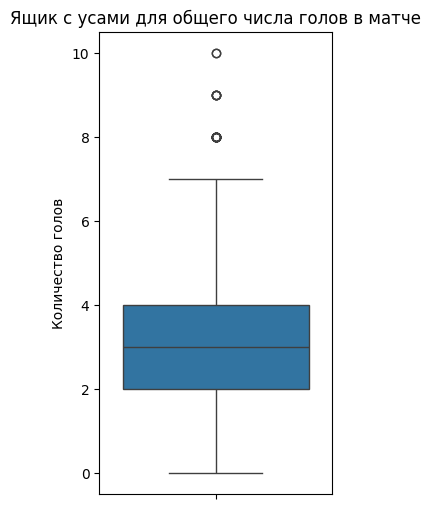


     Большенство матчей в этой лиге результативные
     Имеются выбросы , по которым можно сказать что в этой лиги были матчи с огромным счетом
     


In [511]:
# Аналогично

df_best_league = leagues_sesons_gap.loc[leagues_sesons_gap['league_name'] == league]

df_best_league.reset_index(drop=True, inplace=True)
df_best_league['goals'] = df_best_league['home_goals'] + df_best_league['away_goals']

mean_goals = df_best_league['goals'].mean()
std_goals = df_best_league['goals'].std()

plt.figure(figsize=(3, 6))
sns.boxplot(y=df_best_league['goals'])

plt.title('Ящик с усами для общего числа голов в матче')
plt.ylabel('Количество голов')
plt.show()

print(
    f'''
     Большенство матчей в этой лиге результативные
     Имеются выбросы , по которым можно сказать что в этой лиги были матчи с огромным счетом
     '''
      )

#### Закрываем соединение

In [512]:
cnx.close()